In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = "https://drive.google.com/open?id=1dODoVwyhIMNeqii0eEUYkYaoKPZMqsD7"
fluff, id = link.split('=')

In [0]:
import pandas as pd

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('cleaned_dataset.csv')  
df = pd.read_csv('cleaned_dataset.csv')

transcripts = df["transcript"]

In [5]:
# title = df["title"].tolist()
# print(title)
!pip install num2words

     |████████████████████████████████| 102kB 2.2MB/s 


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer 
from nltk.tokenize import word_tokenize
from num2words import num2words

In [0]:
def change_to_lowercase(sentence):
    new_text = ""
    for word in sentence.split(" "):
        new_text += " " + word.lower()
    return new_text

In [0]:
def remove_stopwords(sentence,sw):
    new_text = ""
    for word in sentence.split(" "):
        if word not in sw:
            new_text += " " + word
    return new_text

In [0]:
def remove_punctuation(sentence,symbols):
    for i in symbols:
        sentence = sentence.replace(i,' ')
    return sentence.replace("'", "")

In [0]:
def remove_single_char(sentence):
    new_text = ""
    for w in sentence.split(" "):
        if len(w) > 1:
            new_text += " " + w
            
    return new_text

In [0]:
def perform_stemming(sentence,stemmer):
    new_text = ""
    for word in sentence.split(" "):
        new_text += " " + stemmer.stem(word)
    return new_text

In [0]:
def convert_numbers(sentence):
    new_text = ""
    for word in sentence.split(" "):
        if word.isnumeric():
            word = num2words(word)
        new_text += " " + word
        
    return new_text

In [0]:
def get_df(transcript_list):
    DF ={}
    for i in range(len(transcript_list)):
        tokens = transcript_list[i]
        for w in tokens.split(" "):
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}
    return DF

In [0]:
import numpy as np
from nltk.corpus import stopwords

sw = stopwords.words('english')
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n,"
#stemmer = LancasterStemmer()

transcript_list = []
one_word_transcript_list = []

for i, script in enumerate(transcripts):
    sentences = script.split(".")
    sentences = np.char.lower(sentences)
    cleaned_script = ""
    one_word_cleaned_script = ""
    for sentence in sentences:
        sentence = change_to_lowercase(sentence)
        #sentence = remove_stopwords(sentence,sw)
        sentence = remove_punctuation(sentence,symbols)
        #sentence = remove_single_char(sentence)
        #sentence = perform_stemming(sentence,stemmer)
        sentence = convert_numbers(sentence)
        sentence = remove_stopwords(sentence,sw)
        sentence = remove_single_char(sentence)
        one_word_cleaned_script += sentence
    one_word_transcript_list.append(one_word_cleaned_script)
    transcript_list.append(cleaned_script)


In [0]:
#Tokenizing

# transcript_list_tokennised = [transcript.split(" ") for transcript in transcript_list]
# new_transcript_list_tokennised = []
# for transcript in transcript_list_tokennised:
#     list_of_tokens = []
#     for word in transcript:
#         if word != "" and word != "—" and len(word)>1:
#             list_of_tokens.append(word)
#     new_transcript_list_tokennised.append(list_of_tokens)

one_word_transcript_list_tokennised = [transcript.split(" ") for transcript in one_word_transcript_list]
one_word_new_transcript_list_tokennised = []
for transcript in one_word_transcript_list_tokennised:
    list_of_tokens = []
    for word in transcript:
        if word != "" and word != "—" and len(word)>1:
            list_of_tokens.append(word)
    one_word_new_transcript_list_tokennised.append(list_of_tokens)

In [0]:
# DF = get_df(transcript_list)

In [0]:
# DF_count = {}

# for i in DF:
#     DF_count[i] = len(DF[i])

# DF_count

In [0]:
# total_vocab = [x for x in DF_count]

In [0]:
# from collections import Counter

# # def doc_freq(token,transcript_list):
# #     count = 0
# #     for transcript in transcript_list:
# #         if token in transcript:
# #             count += 1
# #     return count

# def doc_freq(token):
#     return DF_count[token]
    
# def get_tf_idf(N,transcript_list, title):
#     tf_idf = {}
#     for i in range(N):
#         counter = {}
#         tokens = transcript_list[i].split(" ")
#         tokens = list(filter(None,tokens))
#         str_tokens = ""
#         for token in tokens:
#             if token != "":
#                 str_tokens += token + " "
#                 if token in counter.keys():
#                     counter[token] += 1
#                 else:
#                     counter[token] = 1
#         #print(counter)
#         for token in np.unique(str_tokens.split(" ")):
#             if token != "":
#                 tf = counter[token]/len(tokens)
#                 #print(i, token, counter[token], len(tokens))
#                 df = doc_freq(token)
#                 idf = np.log(N/(df+1))
#                 tf_idf[i,token] = tf*idf
#     return tf_idf

In [0]:
# N = len(transcript_list)
# words_count = len(total_vocab)

# tf_idf_dict = get_tf_idf(N,transcript_list,title)

In [0]:
# for key,values in tf_idf_dict.items():
#     if values > 0.05:
#         print(key, values)

In [0]:
def get_pdf(new_transcript_list_tokennised):
    # get num docs with term
    term_list = []
    for d in new_transcript_list_tokennised:
        #Get Unique terms
        term_list += list(set(d))
    counter = Counter(term_list)
    for k,v in counter.items():
        counter[k] = np.exp(v/len(new_transcript_list_tokennised))
        
    return counter

In [0]:
from collections import Counter

pdf_counter_obj = get_pdf(one_word_new_transcript_list_tokennised)

In [0]:
def get_tf(tokenised_doc):
    counter = Counter(tokenised_doc)
    for term in counter.keys():
        counter[term] = counter[term] / len(tokenised_doc)
    return counter

In [0]:
tf_pdf_dict = {}

for index, doc in enumerate(one_word_new_transcript_list_tokennised):
    tf_pdf_dict[index] = {}
    ret_dict = get_tf(doc)
    for key,val in ret_dict.items():
        tf_pdf_dict[index][key] = val*pdf_counter_obj[key]       
    

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [0]:
# #Most frequently occuring words
# def get_top_n_words(corpus):
#     vec = CountVectorizer().fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in      
#                    vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], 
#                        reverse=True)
#     return words_freq

# #Most frequently occuring Bi-grams
# def get_top_n2_words(corpus):
#     vec1 = CountVectorizer(ngram_range=(2,2)).fit(corpus)
#     bag_of_words = vec1.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in     
#                   vec1.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], 
#                 reverse=True)
#     return words_freq

# #Most frequently occuring Tri-grams
# def get_top_n3_words(corpus):
#     vec1 = CountVectorizer(ngram_range=(3,3)).fit(corpus)
#     bag_of_words = vec1.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in     
#                   vec1.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], 
#                 reverse=True)
#     return words_freq


In [0]:
stop_words=set(stopwords.words("english"))

In [0]:
# # list_transcripts = transcripts.tolist()
# cleaned_list_transcripts = [transcript.replace('\\',"") for transcript in transcript_list]


In [0]:
# top2_words = get_top_n2_words(cleaned_list_transcripts)
# top3_words = get_top_n3_words(cleaned_list_transcripts)

In [0]:
# def get_filtered_word_list(topn_words):
#     topn_words_list = []
#     for word in topn_words:
#         if word[1]>5:
#             topn_words_list.append(word)
#         else:
#             break

#     return topn_words_list

In [0]:
# top2_words_list = get_filtered_word_list(top2_words)
# top3_words_list = get_filtered_word_list(top3_words)

In [0]:
# top2words_counter = 0
# top3words_counter = 0
# for words in top2_words_list:
#     top2words_counter+= words[1]

# for words in top3_words_list:
#     top3words_counter+= words[1]

In [0]:
# top_2_words_tokenised = [word[0] for word in top2_words_list]
# top_3_words_tokenised = [word[0] for word in top3_words_list]

In [0]:
# def get_n_pdf(top_words,count):
#     pdf_dict = {}
#     for item in top_words:
#         pdf_dict[item[0]] = np.exp(item[1]/count)
#     return pdf_dict

In [0]:
# pdf_counter2_obj = get_n_pdf(top2_words_list,2340)
# pdf_counter3_obj = get_n_pdf(top3_words_list,2340)

In [0]:
def get_pdf(new_transcript_list_tokennised):
    # get num docs with term
    term_list = []
    for d in new_transcript_list_tokennised:
        #Get Unique terms
        term_list += list(set(d))
    counter = Counter(term_list)
    for k,v in counter.items():
        counter[k] = np.exp(v/len(new_transcript_list_tokennised))
        
    return counter

pdf_counter1_obj = get_pdf(one_word_new_transcript_list_tokennised)

In [0]:
def get_tf(tokenised_doc):
    counter = Counter(tokenised_doc)
    for term in counter.keys():
        counter[term] = counter[term] / len(tokenised_doc)
    return counter

In [0]:
def get_terms_list(transcript_list_tokennised):
    terms_list = []
    for transcript in transcript_list_tokennised:
        terms_list += set(transcript)

    return terms_list

In [0]:
one_word_terms_list = get_terms_list(one_word_new_transcript_list_tokennised)
# two_word_terms_list = get_terms_list(top_2_words_tokenised)
# three_word_terms_list = get_terms_list(top_3_words_tokenised)

In [0]:
def get_transcript_tokenised_list(top_n_words_tokenised,transcripts):
    ret_list = []
    for index,transcript in enumerate(transcripts):
        transcript_list = []
        for word in top_n_words_tokenised:
            if word in transcript:
                transcript_list.append(word)
        ret_list.append(transcript_list)
        
    return ret_list

In [0]:
# new_transcript_list_2tokenised = get_transcript_tokenised_list(top_2_words_tokenised,cleaned_list_transcripts)

In [0]:
# new_transcript_list_3tokenised = get_transcript_tokenised_list(top_3_words_tokenised,cleaned_list_transcripts)

In [0]:
tf_pdf1_dict = {}

for index, doc in enumerate(one_word_new_transcript_list_tokennised):
    tf_pdf1_dict[index] = {}
    ret_dict = get_tf(doc)
    for key,val in ret_dict.items():
        tf_pdf1_dict[index][key] = val*pdf_counter1_obj[key]
    for word in one_word_terms_list:
        if word not in ret_dict.keys():
            tf_pdf1_dict[index][word] = 0

In [0]:
# tf_pdf2_dict = {}

# for index, doc in enumerate(new_transcript_list_2tokenised):
#     tf_pdf2_dict[index] = {}
#     ret_dict = get_tf(doc)
#     for key,val in ret_dict.items():
#         tf_pdf2_dict[index][key] = val*pdf_counter2_obj[key] 
#     for word in two_word_terms_list:
#         if word not in ret_dict.keys():
#             tf_pdf2_dict[index][word] = 0     

In [0]:
# tf_pdf3_dict = {}

# for index, doc in enumerate(new_transcript_list_3tokenised):
#     tf_pdf3_dict[index] = {}
#     ret_dict = get_tf(doc)
#     for key,val in ret_dict.items():
#         tf_pdf3_dict[index][key] = val*pdf_counter3_obj[key]
#     for word in three_word_terms_list:
#         if word not in ret_dict.keys():
#             tf_pdf3_dict[index][word] = 0      

In [0]:
def get_norm_value(tf_pdf_dict):
    word_score_dict = {}
    for key,value in tf_pdf_dict.items():
        for word, score in value.items():
            if word in word_score_dict.keys():
                word_score_dict[word] += score
            else:
                word_score_dict[word] = score
    return word_score_dict

In [0]:
total_norm_val_pdf1_dict = get_norm_value(tf_pdf1_dict)
# total_norm_val_pdf2_dict = get_norm_value(tf_pdf2_dict)
# total_norm_val_pdf3_dict = get_norm_value(tf_pdf3_dict)

In [0]:
tf_pdf1_list = []

for k,v in tf_pdf1_dict.items():
    tf_pdf1_list.append(v)

# tf_pdf2_list = []

# for k,v in tf_pdf2_dict.items():
#     tf_pdf2_list.append(v)

# tf_pdf3_list = []

# for k,v in tf_pdf3_dict.items():
#     tf_pdf3_list.append(v)

In [0]:
df_features = pd.DataFrame()
df_features["transcript"] = df["transcript"]

In [0]:
df_features = pd.DataFrame(tf_pdf1_list)

In [0]:
feature_to_pass = df_features.values

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = "https://drive.google.com/open?id=1gAEfY0SiWVWovW6buJkox8mQilsA7xl0"
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('exported.csv')  
target_df = pd.read_csv('exported.csv')


In [0]:
target_y = target_df["normalised_count_per_view"].values
target_y=target_y.astype('int')

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=1000).fit(feature_to_pass,target_y)

In [0]:
cols = X_new.get_support(indices=True)


features_df_new = df_features.iloc[:,cols]

In [0]:
from google.colab import files

In [166]:
features_df_new

,good,morning,laughter,great,fact,im,want,talk,weve,people,us,happen,play,education,actually,dont,say,often,back,see,blood,theyre,like,oh,night,ask,wall,money,think,children,school,year,two,thousand,world,look,third,innovation,seeing,could,...,minto,thylacine,nanoparticle,ig,anas,romo,abed,gando,edi,♪♪,cmu,gwen,clathrin,bercken,handel,daria,catadores,carroças,carroça,hg,spinosaurus,tori,braddock,bonica,whitopia,heforshe,crispr,asl,ev,relaunchers,nr,ln,humanae,sirna,cavefishes,cohousing,obituaries,décima,strum,ems
0,0.003987,0.000819,0.054723,0.003554,0.003563,0.009080,0.013298,0.003522,0.004623,0.026352,0.004771,0.001952,0.001753,0.017749,0.008466,0.015554,0.013717,0.003835,0.004384,0.008102,0.000760,0.010394,0.015838,0.000861,0.003494,0.001017,0.000762,0.000910,0.040491,0.007173,0.008530,0.003797,0.006628,0.001065,0.010531,0.005731,0.002699,0.000738,0.003429,0.003066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.003829,0.000000,0.044473,0.001707,0.000000,0.015262,0.008515,0.005075,0.000000,0.021356,0.011456,0.000000,0.000000,0.000000,0.000000,0.004482,0.005929,0.000000,0.010526,0.002335,0.000000,0.001872,0.015212,0.000000,0.005034,0.000000,0.000000,0.001312,0.004487,0.000000,0.000000,0.000000,0.011935,0.000000,0.008669,0.000000,0.000000,0.000000,0.000000,0.008834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.007988,0.000703,0.045781,0.001017,0.000000,0.024689,0.008881,0.003024,0.002977,0.011313,0.000000,0.000838,0.000753,0.000000,0.003634,0.012019,0.005889,0.000000,0.006273,0.005566,0.000652,0.005578,0.033242,0.001479,0.000750,0.000000,0.000000,0.000782,0.008023,0.000770,0.000000,0.002174,0.008536,0.000915,0.006458,0.001230,0.000000,0.000000,0.000000,0.003949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005840,0.000719,0.012331,0.000000,0.001044,0.009310,0.002597,0.001032,0.000000,0.018817,0.013976,0.000000,0.000000,0.000000,0.004960,0.013669,0.000000,0.003371,0.005137,0.001424,0.000000,0.001142,0.024745,0.000757,0.000000,0.000894,0.000000,0.002400,0.004106,0.000788,0.000833,0.000000,0.004368,0.000000,0.005288,0.000000,0.000791,0.000649,0.000000,0.004042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.005242,0.000000,0.013837,0.000000,0.000000,0.001492,0.001457,0.000000,0.001140,0.014618,0.001568,0.000962,0.000000,0.000000,0.001391,0.004601,0.004058,0.001891,0.004323,0.019176,0.000000,0.000000,0.041650,0.000000,0.000861,0.000000,0.000000,0.006285,0.007679,0.004421,0.000000,0.002497,0.008170,0.001050,0.048956,0.012717,0.001774,0.000000,0.000000,0.007558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,0.000000,0.000000,0.003737,0.000000,0.006326,0.016121,0.003935,0.000000,0.000000,0.021931,0.025411,0.000000,0.000000,0.000000,0.007515,0.008284,0.000000,0.002553,0.007783,0.012947,0.000000,0.000000,0.018746,0.000000,0.000000,0.000000,0.000000,0.000000,0.012442,0.004775,0.000000,0.003371,0.022063,0.011346,0.004006,0.011447,0.000000,0.000000,0.000000,0.012247,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [167]:
X_new.pvalues_

array([0.69810361, 0.86630104, 0.23968796, ..., 0.92819533, 0.94919209,
       0.94919209])

<BarContainer object of 1000 artists>

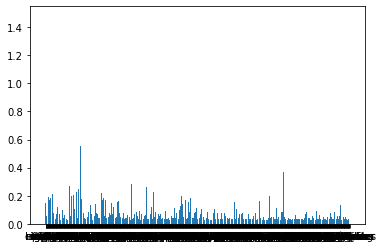

In [168]:
import matplotlib.pyplot as plt

plt.bar(features_df_new.columns, X_new.scores_[cols])

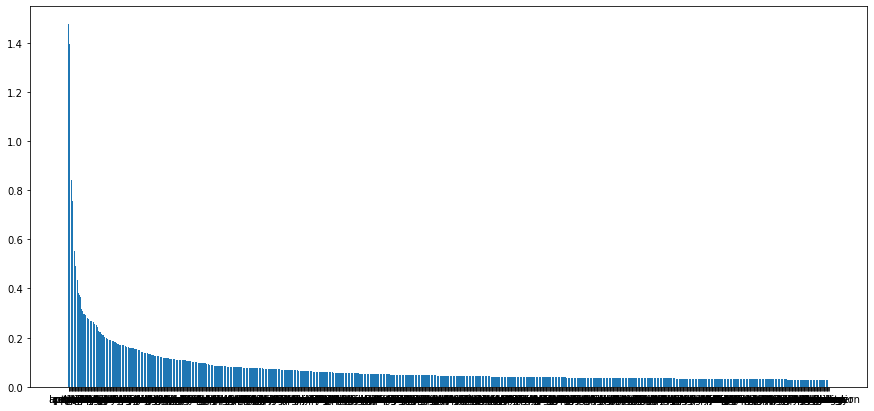

In [169]:
sorted_k_features = list(sorted(list(zip(features_df_new.columns, X_new.scores_[cols])), key=lambda x: x[1], reverse=True))
features, scores = list(zip(*sorted_k_features))

plt.figure(figsize=(15, 7))
plt.bar(features, scores)
plt.show()

In [0]:
selected_scores = [score for score in scores if score > 0.2]

In [171]:
len(selected_scores)

48

In [0]:
X_new = SelectKBest(chi2, k=48).fit(feature_to_pass,target_y)

cols = X_new.get_support(indices=True)

features_df_new = df_features.iloc[:,cols]

In [173]:
features_df_new

,laughter,im,people,dont,see,like,oh,money,think,children,world,applause,thank,little,companies,country,art,music,dance,body,women,image,video,need,piece,change,business,air,global,light,states,percent,computer,countries,camera,inside,project,economic,health,social,space,dollars,cave,3d,object,robots,robot,♫♫
0,0.054723,0.009080,0.026352,0.015554,0.008102,0.015838,0.000861,0.000910,0.040491,0.007173,0.010531,0.006917,0.004954,0.004113,0.000786,0.000931,0.001598,0.002404,0.004267,0.001749,0.002524,0.000801,0.000829,0.005305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,0.044473,0.015262,0.021356,0.004482,0.002335,0.015212,0.000000,0.001312,0.004487,0.000000,0.008669,0.014948,0.007137,0.003951,0.000000,0.002684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005732,0.001221,0.003303,0.002441,0.002329,0.006138,0.001245,0.003832,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0.045781,0.024689,0.011313,0.012019,0.005566,0.033242,0.001479,0.000782,0.008023,0.000770,0.006458,0.017817,0.008507,0.005886,0.000675,0.000800,0.000686,0.002752,0.000000,0.000000,0.000000,0.000000,0.000000,0.003416,0.001456,0.000000,0.000000,0.000000,0.000732,0.000000,0.002284,0.003655,0.002813,0.000721,0.00128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,0.012331,0.009310,0.018817,0.013669,0.001424,0.024745,0.000757,0.002400,0.004106,0.000788,0.005288,0.010638,0.001451,0.007230,0.000000,0.002455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004662,0.000000,0.004030,0.000744,0.000710,0.000000,0.000759,0.000000,0.006547,0.000000,0.000000,0.00000,0.000799,0.002276,0.004159,0.001484,0.000785,0.000784,0.000755,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.013837,0.001492,0.014618,0.004601,0.019176,0.041650,0.000000,0.006285,0.007679,0.004421,0.048956,0.006821,0.001628,0.004056,0.000000,0.012858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005231,0.000000,0.006783,0.000000,0.000000,0.001681,0.000000,0.006995,0.010494,0.000808,0.020714,0.00000,0.000000,0.000000,0.000000,0.009157,0.002641,0.000000,0.001695,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,0.003737,0.016121,0.021931,0.008284,0.012947,0.018746,0.000000,0.000000,0.012442,0.004775,0.004006,0.004605,0.004397,0.000000,0.000000,0.022323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003532,0.000000,0.003053,0.000000,0.000000,0.004539,0.000000,0.000000,0.002834,0.000000,0.002238,0.00000,0.000000,0.000000,0.002100,0.000000,0.021398,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2336,0.011455,0.006178,0.006723,0.006349,0.006615,0.014367,0.000000,0.000000,0.000000,0.000000,0.000000,0.007059,0.006740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005413,0.000000,0.000000,0.000000,0.000000,0.000000,0.003526,0.000000,0.008688,0.000000,0.000000,0.00000,0.003710,0.000000,0.000000,0.000000,0.000000,0.000000,0.003508,0.011175,0.0,0.000000,0.000000,0.002849,0.0
2337,0.002572,0.005548,0.000000,0.000000,0.017823,0.025808,0.000000,0.000000,0.028548,0.000000,0.000000,0.003170,0.003027,0.002513,0.000000,0.000000,0.000000,0.000000,0.000000,0.001603,0.000000,0.000000,0.000000,0.000000,0.000000,0.002101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001501,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001637,0.000000,0.000000,0.000000,0.0,0.000000,0.028317,0.015354,0.0
2338,0.033248,0.010758,0.037076,0.005528,0.019199,0.031275,0.001020,0.001079,0.003690,0.000000,0.016

In [0]:
from google.colab import files

features_df_new.to_csv('features_unigram.csv')

files.download('features_unigram.csv')